# Exploring the Weather in Athens - Assignment Practical Data Science

---

> Nikos Tsoukalelis, Data Science Part Time student <br />
> Athens University of Economics and Business <br />
> ntsoukalelis@aueb.gr

## Q1:

### Obtain the data

>Firstly we start by importing the necessary libraries and then from the https://www.ncdc.noaa.gov/cdo-web/ we download the file from which we will get the data for our analysis.
> <br> The file is in csv format so we can read it and have access to the data.

In [1597]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
hnms=pd.read_csv('2757536.csv')
hnms

,STATION,NAME,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,GR000016716,"HELLINIKON, GR",01-01-55,0.00,NaN,NaN,65.0,50.0
1,GR000016716,"HELLINIKON, GR",02-01-55,0.08,NaN,NaN,58.0,45.0
2,GR000016716,"HELLINIKON, GR",03-01-55,0.00,NaN,NaN,60.0,49.0
3,GR000016716,"HELLINIKON, GR",04-01-55,0.00,NaN,NaN,66.0,45.0
4,GR000016716,"HELLINIKON, GR",05-01-55,0.00,NaN,NaN,64.0,47.0
...,...,...,...,...,...,...,...,...
23246,GR000016716,"HELLINIKON, GR",27-12-20,0.00,NaN,62.0,NaN,NaN
23247,GR000016716,"HELLINIKON, GR",28-12-20,0.26,NaN,59.0,65.0,53.0
23248,GR000016716,"HELLINIKON, GR",29-12-20,0.00,NaN,61.0,68.0,54.0
23249,GR000016716,"HELLINIKON, GR",30-12-20,0.00,NaN,62.0,68.0,59.0


>Then we rearrange the colums so we can get 'DATE' column first as a better outlook for the table and the upcoming analysis.
> <br> Furthermore we transform 'DATE' values to datetime type and changing the format in order to get the same-format values with the ones from the second data set we need to use (METEO data).
> <br> Then we fill all the NA values in the TAVG column with the calculation for the average based on the adjacent columns TMIN and TMAX.
>
> At the end we round the values and save in csv.
> <br> After running the dataframe to check it we notice that the dates have been mixed a bit. Before the 1970 every date shows with the 21st century-number, that is:
> <br> instead of 1955 we get 2055 or instead of 1967 we get 2067.
> <br> For now we will keep it as it is and we will deal with this oddity in next steps of our analysis.

In [1598]:
# rearranging the columns coulmns
hnms=hnms[['DATE', 'STATION', 'NAME', 'PRCP', 'SNWD', 'TAVG', 'TMAX', 'TMIN']]

# changing date format
hnms['DATE'] = pd.to_datetime(hnms.DATE,dayfirst=True)
hnms['DATE'] = pd.to_datetime(hnms['DATE'], format='%Y-%m-%d')

#filling TAVG blanks using the calculations with the adjacent columns TMAX,TMIN.
# doing the same for the blanks in TMAX and TMIN.
hnms['TAVG'].fillna((hnms['TMAX']+hnms['TMIN'])/2,inplace=True)
hnms['TMIN'].fillna(2*(hnms['TAVG'])-hnms['TMAX'],inplace=True)
hnms['TMAX'].fillna(2*(hnms['TAVG'])-hnms['TMIN'],inplace=True)
hnms['TAVG']= (hnms['TAVG']-32)*(5/9)
hnms['TMAX']= (hnms['TMAX']-32)*(5/9)
hnms['TMIN']= (hnms['TMIN']-32)*(5/9)
hnms['PRCP']= 25.4*hnms['PRCP']

hnms=hnms.round({'PRCP':1,'SNWD':1, 'TAVG':0,'TMAX':0,'TMIN':0})

hnms.to_csv('changed_dates.csv')
hnms

,DATE,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN
0,2055-01-01,GR000016716,"HELLINIKON, GR",0.0,NaN,14.0,18.0,10.0
1,2055-01-02,GR000016716,"HELLINIKON, GR",2.0,NaN,11.0,14.0,7.0
2,2055-01-03,GR000016716,"HELLINIKON, GR",0.0,NaN,12.0,16.0,9.0
3,2055-01-04,GR000016716,"HELLINIKON, GR",0.0,NaN,13.0,19.0,7.0
4,2055-01-05,GR000016716,"HELLINIKON, GR",0.0,NaN,13.0,18.0,8.0
...,...,...,...,...,...,...,...,...
23246,2020-12-27,GR000016716,"HELLINIKON, GR",0.0,NaN,17.0,NaN,NaN
23247,2020-12-28,GR000016716,"HELLINIKON, GR",6.6,NaN,15.0,18.0,12.0
23248,2020-12-29,GR000016716,"HELLINIKON, GR",0.0,NaN,16.0,20.0,12.0
23249,2020-12-30,GR000016716,"HELLINIKON, GR",0.0,NaN,17.0,20.0,15.0


> Next step is to import the second available dataset and read it as csv. We downloaded the dataset from the:
> <br> https://data.hellenicdataservice.gr/dataset/66e1c19a-7b0e-456f-b465-b301a1130e3f.
> <br> The daset contains data from 2010-2019 and we will use it to fill blanks and enhance completeness.

In [1599]:
meteo=pd.read_csv('athens.csv',header=None)
meteo

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2010-01-01,17.9,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7
1,2010-01-02,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
2,2010-01-03,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4
3,2010-01-04,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0
4,2010-01-05,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,2019-12-27,10.1,10.2,10.0,60.3,79,44,1018.4,1019.9,1016.8,0.0,2.9,NE,8.0
3648,2019-12-28,8.3,8.4,8.2,60.9,82,46,1016.0,1017.2,1014.2,7.2,4.3,NE,12.8
3649,2019-12-29,6.4,6.5,6.4,73.4,82,66,1017.6,1018.9,1016.5,3.4,10.6,NNE,24.5
3650,2019-12-30,4.0,4.0,3.9,83.9,90,65,1020.0,1024.2,1016.6,12.4,5.1,NE,15.0


>A small rearrangement on the colums as well so we can get 'DATE' column first as a better outlook for the table and the upcoming analysis.
> <br> After that we put headers in the columns as they had no headers when we downloaded the dataset. I considered last column rainfall as precipitation.
> <br> Furthermore we transform 'DATE' values to datetime type and changing the format in order to get the same-format values with the first dataset.
> <br> Lastly cheking the data types.

In [1600]:
meteo.columns= ['DATE', 'TAVG_M', 'TMAX_M','TMIN_M','HUM1','HUM2', 'HUM3', 'HUM4', 'HUM5','HUM6', 'PRCP_M','wind speed', 'wind direction','wind gust' ]
meteo['DATE'] = pd.to_datetime(meteo.DATE)

# using the dtypes formula to check the data types
datatypemeteo=meteo.dtypes
datatypehnms=hnms.dtypes

In [1601]:
datatypemeteo

DATE              datetime64[ns]
TAVG_M                    object
TMAX_M                    object
TMIN_M                    object
HUM1                     float64
HUM2                       int64
HUM3                       int64
HUM4                     float64
HUM5                     float64
HUM6                     float64
PRCP_M                   float64
wind speed               float64
wind direction            object
wind gust                float64
dtype: object

In [1602]:
datatypehnms

DATE       datetime64[ns]
STATION            object
NAME               object
PRCP              float64
SNWD              float64
TAVG              float64
TMAX              float64
TMIN              float64
dtype: object

### Merging the data

>Then we need to cobine the data. We do that so we can have a merged view of the two datasets so we can fill the TAVG, TMIN, TMAX columns of the first dataset from the second one, where blanks.
> <br> Merging is done on the DATE column and we selected 'right' so we can get only the common data from the two sets, that is the 2010-2019 period. We could achieve that using also the inner join.

In [1603]:
meteo.to_csv('changed_meteo.csv')
hnms_merge=pd.merge(hnms,
              meteo[['DATE','TAVG_M','TMAX_M','TMIN_M','PRCP_M']],
              on = 'DATE',
              how='right')
hnms_merge

,DATE,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN,TAVG_M,TMAX_M,TMIN_M,PRCP_M
0,2010-01-01,GR000016716,"HELLINIKON, GR",NaN,NaN,18.0,22.0,14.0,17.9,18.1,17.8,0.2
1,2010-01-02,GR000016716,"HELLINIKON, GR",0.0,NaN,16.0,18.0,14.0,15.6,15.7,15.5,0.0
2,2010-01-03,GR000016716,"HELLINIKON, GR",0.0,NaN,13.0,16.0,11.0,13.5,13.6,13.4,0.0
3,2010-01-04,GR000016716,"HELLINIKON, GR",0.0,NaN,9.0,11.0,6.0,9.5,9.6,9.5,0.0
4,2010-01-05,GR000016716,"HELLINIKON, GR",0.0,NaN,13.0,16.0,8.0,13.4,13.5,13.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3647,2019-12-27,GR000016716,"HELLINIKON, GR",0.0,NaN,10.0,13.0,6.0,10.1,10.2,10.0,0.0
3648,2019-12-28,GR000016716,"HELLINIKON, GR",0.0,NaN,8.0,11.0,6.0,8.3,8.4,8.2,7.2
3649,2019-12-29,GR000016716,"HELLINIKON, GR",17.5,NaN,6.0,8.0,4.0,6.4,6.5,6.4,3.4
3650,2019-12-30,GR000016716,"HELLINIKON, GR",4.6,NaN,4.0,8.0,1.0,4.0,4.0,3.9,12.4


> Filling the blanks from the columns of the second dataset (Meteo file, TAVG_M, TMAX_M, TMIN_M, PRCP_M)
> <br> I considered last column from meteo file (2nd dataset) that it is called rainfall as the equivalent of the precipitation column from the 1st dataset (PRC_M) 

In [1604]:
hnms_merge['TMIN'].fillna(hnms_merge['TMIN_M'],inplace=True)
hnms_merge['TMAX'].fillna(hnms_merge['TMAX_M'],inplace=True)
hnms_merge['TAVG'].fillna(hnms_merge['TAVG_M'],inplace=True)
hnms_merge['PRCP'].fillna(hnms_merge['PRCP_M'],inplace=True)
hnms_merge.to_csv('hnms-meteo.csv')

hnms_merge

,DATE,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN,TAVG_M,TMAX_M,TMIN_M,PRCP_M
0,2010-01-01,GR000016716,"HELLINIKON, GR",0.2,NaN,18.0,22.0,14.0,17.9,18.1,17.8,0.2
1,2010-01-02,GR000016716,"HELLINIKON, GR",0.0,NaN,16.0,18.0,14.0,15.6,15.7,15.5,0.0
2,2010-01-03,GR000016716,"HELLINIKON, GR",0.0,NaN,13.0,16.0,11.0,13.5,13.6,13.4,0.0
3,2010-01-04,GR000016716,"HELLINIKON, GR",0.0,NaN,9.0,11.0,6.0,9.5,9.6,9.5,0.0
4,2010-01-05,GR000016716,"HELLINIKON, GR",0.0,NaN,13.0,16.0,8.0,13.4,13.5,13.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3647,2019-12-27,GR000016716,"HELLINIKON, GR",0.0,NaN,10.0,13.0,6.0,10.1,10.2,10.0,0.0
3648,2019-12-28,GR000016716,"HELLINIKON, GR",0.0,NaN,8.0,11.0,6.0,8.3,8.4,8.2,7.2
3649,2019-12-29,GR000016716,"HELLINIKON, GR",17.5,NaN,6.0,8.0,4.0,6.4,6.5,6.4,3.4
3650,2019-12-30,GR000016716,"HELLINIKON, GR",4.6,NaN,4.0,8.0,1.0,4.0,4.0,3.9,12.4


> Then we merge the 3652 rows-dataset with the original so we can have the original dataset with the updated values for the NAs.
><br> We do that by using outer join so we can get the data from both datasets + the common ones.
><br> After that we fill the NAs and we discard the columns that are not needed. Then we rename them.
><br> Furthermore I discarded a specific row as it was messing the data type of specific columns (e.g.TAVG) as it contained these symbols "---"

In [1605]:
hnms_updated=pd.merge(hnms,
                hnms_merge[['DATE','STATION','NAME','PRCP','SNWD','TAVG','TMAX','TMIN']],
                on='DATE',
                how = 'outer')

hnms_updated['DATE']=pd.to_datetime(hnms_updated['DATE'])

# filling blanks
hnms_updated['PRCP_y'].fillna(hnms_updated['PRCP_x'],inplace=True)
hnms_updated['SNWD_y'].fillna(hnms_updated['SNWD_x'],inplace=True)
hnms_updated['TAVG_y'].fillna(hnms_updated['TAVG_x'],inplace=True)
hnms_updated['TMAX_y'].fillna(hnms_updated['TMAX_x'],inplace=True)
hnms_updated['TMIN_y'].fillna(hnms_updated['TMIN_x'],inplace=True)

# removing columns that are not needed and renaming the ones left
hnms_updated1=hnms_updated.drop(['PRCP_x','SNWD_x','TAVG_x','TMAX_x','TMIN_x', 'STATION_y', 'NAME_y'], 1)
hnms_updated1.columns= ['DATE', 'STATION', 'NAME','PRCP','SNWD','TAVG', 'TMAX', 'TMIN']

# removing this row as it was causing problems for specific data types
hnms_updated1=hnms_updated1.drop([23591])

hnms_updated1.dtypes

DATE       datetime64[ns]
STATION            object
NAME               object
PRCP              float64
SNWD              float64
TAVG               object
TMAX               object
TMIN               object
dtype: object

In [1606]:
hnms_updated1.to_csv('Original_Data_updated.csv')
hnms_updated1

,DATE,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN
0,2055-01-01,GR000016716,"HELLINIKON, GR",0.0,NaN,14.0,18.0,10.0
1,2055-01-02,GR000016716,"HELLINIKON, GR",2.0,NaN,11.0,14.0,7.0
2,2055-01-03,GR000016716,"HELLINIKON, GR",0.0,NaN,12.0,16.0,9.0
3,2055-01-04,GR000016716,"HELLINIKON, GR",0.0,NaN,13.0,19.0,7.0
4,2055-01-05,GR000016716,"HELLINIKON, GR",0.0,NaN,13.0,18.0,8.0
...,...,...,...,...,...,...,...,...
24099,2017-10-02,NaN,NaN,0.0,NaN,18.7,18.8,18.6
24100,2017-10-08,NaN,NaN,0.0,NaN,17.8,17.9,17.7
24101,2017-10-15,NaN,NaN,0.0,NaN,20.4,20.5,20.3
24102,2017-10-27,NaN,NaN,0.0,NaN,17.8,17.9,17.7


### Checking the data

> We then check the data from the 1st data set. 
> <br> It seems that there are dates from the hnms file (Hellenic National Meterological Service, that is the Hellinikon station data) that they do not exist for the period 2010-2019. 
> <br> For example 26/05/2012 it appears in Meteo file but not in the hnms one. The check has been done in the csv file I exported.

In [1607]:
start_date = '2010-1-1'
end_date = '2019-12-31'
after_start_date = hnms["DATE"] >= start_date
before_end_date = hnms["DATE"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = hnms.loc[between_two_dates]
filtered_dates.to_csv('hnms_after2010.csv')

filtered_dates

,DATE,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN
20086,2010-01-01,GR000016716,"HELLINIKON, GR",NaN,NaN,18.0,22.0,14.0
20087,2010-01-02,GR000016716,"HELLINIKON, GR",0.0,NaN,16.0,18.0,14.0
20088,2010-01-03,GR000016716,"HELLINIKON, GR",0.0,NaN,13.0,16.0,11.0
20089,2010-01-04,GR000016716,"HELLINIKON, GR",0.0,NaN,9.0,11.0,6.0
20090,2010-01-05,GR000016716,"HELLINIKON, GR",0.0,NaN,13.0,16.0,8.0
...,...,...,...,...,...,...,...,...
22880,2019-12-27,GR000016716,"HELLINIKON, GR",0.0,NaN,10.0,13.0,6.0
22881,2019-12-28,GR000016716,"HELLINIKON, GR",0.0,NaN,8.0,11.0,6.0
22882,2019-12-29,GR000016716,"HELLINIKON, GR",17.5,NaN,6.0,8.0,4.0
22883,2019-12-30,GR000016716,"HELLINIKON, GR",4.6,NaN,4.0,8.0,1.0


### Conclusions - Q1


After the previous procedures we managed to update the original file and to upgrade the completeness in the file: 

<br> Completeness before
- Before updating: TAVG     90.06%
- Before updating: TMAX     95.94%
- Before updating: TMIN     96.41%

<br>  Completeness after
- After updating:  TAVG     99.99%
- After updating:  TMAX     99.78%
- After updating:  TMIN     99.77%

 <br> The data that were missing were under the columns TAVG, TMIN, TMAX and PRCP. We managed with the use of the second dataset to improve this completeness.
 <br> We also calculated some data based on the other fields (e.g. TAVG, TMAX and TMIN).
 <br> In the last check ('filtered_dates') we see that there are also a few dates that they do not exist at all in the dataset.

## Q2:

### Deviation of Summer Temperatures

> We want to calculate the average of the temperature for the summer months of the years 1974-1999. This will be our baseline value for the plot we want to make
><br> We use the updated dataset hnms_update1 and we choose to filter the summer months for the period '74-'99.

In [1608]:
hnms_updated1['MONTH'] = pd.to_datetime(hnms_updated1['DATE']).dt.month
hnms_updated1['YEAR'] = pd.to_datetime(hnms_updated1['DATE']).dt.year
hnms_updated1['DATE'] = pd.to_datetime(hnms_updated1['DATE'])

hnms1974_1999=hnms_updated1.loc[(hnms_updated1.MONTH>=6) & (hnms_updated1.MONTH<=8) & (hnms_updated1.YEAR>=1974) & (hnms_updated1.YEAR<=1999)]
hnms1974_1999

,DATE,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN,MONTH,YEAR
7091,1974-06-01,GR000016716,"HELLINIKON, GR",0.0,NaN,23.0,27.0,17.0,6,1974
7092,1974-06-02,GR000016716,"HELLINIKON, GR",0.0,NaN,23.0,28.0,20.0,6,1974
7093,1974-06-03,GR000016716,"HELLINIKON, GR",0.3,NaN,22.0,27.0,20.0,6,1974
7094,1974-06-04,GR000016716,"HELLINIKON, GR",2.5,NaN,21.0,24.0,18.0,6,1974
7095,1974-06-05,GR000016716,"HELLINIKON, GR",0.0,NaN,24.0,32.0,18.0,6,1974
...,...,...,...,...,...,...,...,...,...,...
16309,1999-08-27,GR000016716,"HELLINIKON, GR",0.0,NaN,24.0,29.0,21.0,8,1999
16310,1999-08-28,GR000016716,"HELLINIKON, GR",0.0,NaN,24.0,29.0,21.0,8,1999
16311,1999-08-29,GR000016716,"HELLINIKON, GR",0.0,NaN,26.0,30.0,20.0,8,1999
16312,1999-08-30,GR000016716,"HELLINIKON, GR",0.0,NaN,26.0,32.0,21.0,8,1999


> We then calculate the mean summer temperature for the '74-'99 period


In [1609]:
tavg1974_1999=hnms1974_1999['TAVG'].mean()
tavg1974_1999

26.234113712374583

### Correction of the dates

>In the next step we deal with the false dates. In Q1 during the conversion of the date columns to datetime data types the dates before 1970 we showing like 2059/../.. for example. 
> <br> So after I filtered them then I deducted 100 years to show the correct values. If the dataset had actual dates after 2020 (2021,...) then we would change the loc parameter

In [1610]:
hnms_updated_temp=hnms_updated1.loc[hnms_updated1.YEAR>2020]
hnms_updated_temp['NEWDATE']=hnms_updated_temp['DATE']-pd.DateOffset(years=100)
hnms_updated_temp

<ipython-input-1610-302f5c260363>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,DATE,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN,MONTH,YEAR,NEWDATE
0,2055-01-01,GR000016716,"HELLINIKON, GR",0.0,NaN,14.0,18.0,10.0,1,2055,1955-01-01
1,2055-01-02,GR000016716,"HELLINIKON, GR",2.0,NaN,11.0,14.0,7.0,1,2055,1955-01-02
2,2055-01-03,GR000016716,"HELLINIKON, GR",0.0,NaN,12.0,16.0,9.0,1,2055,1955-01-03
3,2055-01-04,GR000016716,"HELLINIKON, GR",0.0,NaN,13.0,19.0,7.0,1,2055,1955-01-04
4,2055-01-05,GR000016716,"HELLINIKON, GR",0.0,NaN,13.0,18.0,8.0,1,2055,1955-01-05
...,...,...,...,...,...,...,...,...,...,...,...
5839,2070-12-27,GR000016716,"HELLINIKON, GR",0.0,NaN,11.0,16.0,7.0,12,2070,1970-12-27
5840,2070-12-28,GR000016716,"HELLINIKON, GR",0.0,NaN,14.0,17.0,11.0,12,2070,1970-12-28
5841,2070-12-29,GR000016716,"HELLINIKON, GR",0.0,NaN,16.0,18.0,13.0,12,2070,1970-12-29
5842,2070-12-30,GR000016716,"HELLINIKON, GR",0.0,NaN,17.0,18.0,13.0,12,2070,1970-12-30


> Then the merging of the new coreccted dataset with the old one follows.
> <br> After that we "tidy up" the data. We create the NEWDATE column we create an extra YEAR column for later use and we remove the columns we don't need and lastly rename the columns.

In [1611]:
hnms_updated2=pd.merge(hnms_updated1,
                hnms_updated_temp[['DATE','STATION','NAME','PRCP','SNWD','TAVG','TMAX','TMIN','MONTH','YEAR','NEWDATE']],
                on='DATE',
                how = 'left')

# the tidying up of the data
hnms_updated2['NEWDATE'].fillna(hnms_updated2['DATE'],inplace=True)
hnms_updated2['YEAR'] = pd.to_datetime(hnms_updated2['NEWDATE']).dt.year
hnms_updated2['YEAR'].fillna(hnms_updated2['YEAR_y'],inplace=True)

hnms_updated2=hnms_updated2.drop(['PRCP_y','SNWD_y','TAVG_y','TMAX_y','TMIN_y', 'STATION_y', 'NAME_y', 'MONTH_y', 'YEAR_x','YEAR_y'], 1)
hnms_updated2.columns= ['DATE', 'STATION', 'NAME','PRCP','SNWD','TAVG', 'TMAX', 'TMIN', 'MONTH', 'NEWDATE','YEAR']

hnms_updated2

,DATE,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN,MONTH,NEWDATE,YEAR
0,2055-01-01,GR000016716,"HELLINIKON, GR",0.0,NaN,14.0,18.0,10.0,1,1955-01-01,1955
1,2055-01-02,GR000016716,"HELLINIKON, GR",2.0,NaN,11.0,14.0,7.0,1,1955-01-02,1955
2,2055-01-03,GR000016716,"HELLINIKON, GR",0.0,NaN,12.0,16.0,9.0,1,1955-01-03,1955
3,2055-01-04,GR000016716,"HELLINIKON, GR",0.0,NaN,13.0,19.0,7.0,1,1955-01-04,1955
4,2055-01-05,GR000016716,"HELLINIKON, GR",0.0,NaN,13.0,18.0,8.0,1,1955-01-05,1955
...,...,...,...,...,...,...,...,...,...,...,...
24098,2017-10-02,NaN,NaN,0.0,NaN,18.7,18.8,18.6,10,2017-10-02,2017
24099,2017-10-08,NaN,NaN,0.0,NaN,17.8,17.9,17.7,10,2017-10-08,2017
24100,2017-10-15,NaN,NaN,0.0,NaN,20.4,20.5,20.3,10,2017-10-15,2017
24101,2017-10-27,NaN,NaN,0.0,NaN,17.8,17.9,17.7,10,2017-10-27,2017


### Manipulating the dataset to calculate the parameters for the plot

> Then using the updated (with the correct dates) data we create a view again for the summer months so we can do the analysis for the mean temperature, yearly but for the whole 1955-2020 period

In [1612]:
hnms_summer=hnms_updated2.loc[(hnms_updated2.MONTH>=6) & (hnms_updated2.MONTH<=8)]
hnms_summer['TAVG']=hnms_summer['TAVG'].astype(float)
hnms_summer=hnms_summer.round({'TAVG':1})
hnms_summer

<ipython-input-1612-dc70a052fd5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,DATE,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN,MONTH,NEWDATE,YEAR
151,2055-06-01,GR000016716,"HELLINIKON, GR",0.0,NaN,22.0,26.0,18.0,6,1955-06-01,1955
152,2055-06-02,GR000016716,"HELLINIKON, GR",0.0,NaN,22.0,27.0,17.0,6,1955-06-02,1955
153,2055-06-03,GR000016716,"HELLINIKON, GR",0.0,NaN,22.0,26.0,17.0,6,1955-06-03,1955
154,2055-06-04,GR000016716,"HELLINIKON, GR",0.0,NaN,23.0,27.0,19.0,6,1955-06-04,1955
155,2055-06-05,GR000016716,"HELLINIKON, GR",0.0,NaN,22.0,27.0,18.0,6,1955-06-05,1955
...,...,...,...,...,...,...,...,...,...,...,...
24086,2017-08-14,NaN,NaN,0.0,NaN,28.9,29.0,28.8,8,2017-08-14,2017
24087,2017-08-15,NaN,NaN,0.0,NaN,29.0,29.1,28.9,8,2017-08-15,2017
24088,2017-08-19,NaN,NaN,0.0,NaN,30.4,30.5,30.3,8,2017-08-19,2017
24089,2017-08-21,NaN,NaN,0.6,NaN,28.2,28.4,28.1,8,2017-08-21,2017


> Grouping the data to plot them yearly, so the grouping is on YEAR level
><br> In the next block of codes takes place the calculation of the rolling average we need for the plot (10-year rolling average)
><br> For that I used a for loop to fill the new column (ROLLING AVERAGE) I created with the values

In [1613]:
groupbyyear=hnms_summer.groupby('YEAR',as_index=False)
groupbyyear.mean()
data_plot=groupbyyear.mean()
data_plot

,YEAR,PRCP,SNWD,TAVG,MONTH
0,1955,0.207609,NaN,25.967391,7.01087
1,1956,0.030435,NaN,27.173913,7.01087
2,1957,0.044565,NaN,27.402174,7.01087
3,1958,0.033696,NaN,27.054348,7.01087
4,1959,0.205435,NaN,26.402174,7.01087
...,...,...,...,...,...
61,2016,0.077174,NaN,28.184783,7.01087
62,2017,0.470652,NaN,28.101087,7.01087
63,2018,0.667391,NaN,27.347826,7.01087
64,2019,0.344565,NaN,28.010870,7.01087


In [1614]:
data_plot['YEAR'] = data_plot['YEAR'].astype(float)
data_plot['ROLLING_AVG']=""

r=data_plot['TAVG']
avg=data_plot['ROLLING_AVG']
a = 0
n = 1
sum=0
while a < 66:
    if a < 10:
        rolling_avg=(r[a]+sum)/n
        avg[a]=rolling_avg
        n=n+1
        sum=r[a]+sum
        a=a+1
    else: 
        rolling_avg=(r[a]+r[a-9]+r[a-8]+r[a-7]+r[a-6]+r[a-5]+r[a-4]+r[a-3]+r[a-2]+r[a-1])/10
        avg[a]=rolling_avg
        a=a+1

data_plot.to_csv('mean SUMMER T.csv')
data_plot

<ipython-input-1614-2d52c66be6dd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-1614-2d52c66be6dd>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,YEAR,PRCP,SNWD,TAVG,MONTH,ROLLING_AVG
0,1955.0,0.207609,NaN,25.967391,7.01087,25.967391
1,1956.0,0.030435,NaN,27.173913,7.01087,26.570652
2,1957.0,0.044565,NaN,27.402174,7.01087,26.847826
3,1958.0,0.033696,NaN,27.054348,7.01087,26.899457
4,1959.0,0.205435,NaN,26.402174,7.01087,26.8
...,...,...,...,...,...,...
61,2016.0,0.077174,NaN,28.184783,7.01087,28.173657
62,2017.0,0.470652,NaN,28.101087,7.01087,28.167283
63,2018.0,0.667391,NaN,27.347826,7.01087,28.085761
64,2019.0,0.344565,NaN,28.010870,7.01087,28.150978


### Plot

> So after that step we now we have the X-axis values which are the 1955-2020 years and the Y-Axis will be the TAVG. The base will be the tavg1974_1979=26.234113712374583
> <br> On the next steps we plot the data!

In [1615]:
from numpy import linspace
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

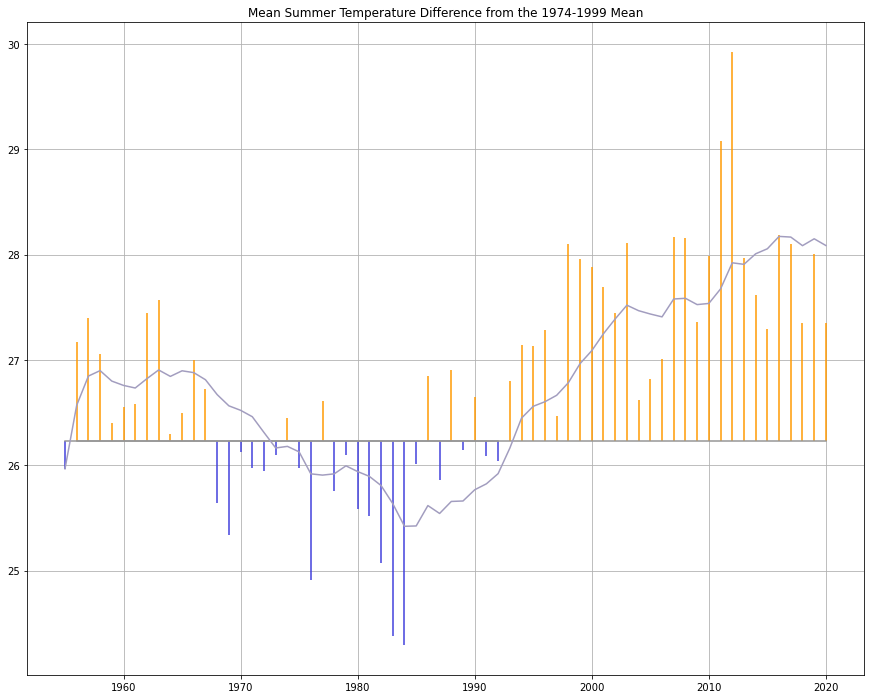

In [1616]:
tavg_up=data_plot.loc[data_plot['TAVG']>=tavg1974_1999]
tavg_down=data_plot.loc[data_plot['TAVG']<tavg1974_1999]
plt.figure(figsize=[15,12])
plt.grid(True)
plt.stem(tavg_up['YEAR'],tavg_up['TAVG'],linefmt ='#FF9900',markerfmt=' ', basefmt ='#959595', bottom=tavg1974_1999)
plt.stem(tavg_down['YEAR'],tavg_down['TAVG'],linefmt ='#403fdc',markerfmt=' ', basefmt ='#959595', bottom=tavg1974_1999)
plt.plot(data_plot['YEAR'],data_plot['ROLLING_AVG'],color='#a29dbf')
plt.title("Mean Summer Temperature Difference from the 1974-1999 Mean")
plt.show()

### Conclusions - Q2


After the previous procedures we managed to plot the data. The plot has useful results.
<br> Given the fact that today 02/11/2021 (delivery date of this assignment) takes place the '2021 United Nations Climate Change Conference' in Glasgow it's irony that we make an analysis on data.

<br> So in this plot we see that 'hot summers' in Greece have began to rise after the 90s compared to the baseline ('74-'99)
<br> That means that the last 25 years or more we see higher temperatures than the previous 25 years average.
<br> Also this could be explained due to the bigger and faster industrialization that took place in Greece after the 80s and ecpecially the 90s.
<br> We also see two peaks or area of peaks, the on near 2000 and after until the 2005 that is the period of the "economical growth" and the Olympics games in Athens. That probably means a lot of activities ours but also state's activities were harmful (heavy industry to support Olympics, invetments in Greece during that 'growth' period etc). Then the data have a drop and after that we have one last big increase that it's during the crisis which suggests that maybe due to harmful ways of heating our homes (as petrol was expensive) maybe had an effect in the climate change situation and in the general increase of the mean temperatures.


## Q3:

### Evolution of Daily Temperatures

> We want to calculate and plot the average daily temperatures for all the years and compare with the baseline og '74-'99.

In [1617]:
hnms_updated2=hnms_updated2.round(0)
hnms_updated2

,DATE,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN,MONTH,NEWDATE,YEAR
0,2055-01-01,GR000016716,"HELLINIKON, GR",0.0,NaN,14.0,18.0,10.0,1,1955-01-01,1955
1,2055-01-02,GR000016716,"HELLINIKON, GR",2.0,NaN,11.0,14.0,7.0,1,1955-01-02,1955
2,2055-01-03,GR000016716,"HELLINIKON, GR",0.0,NaN,12.0,16.0,9.0,1,1955-01-03,1955
3,2055-01-04,GR000016716,"HELLINIKON, GR",0.0,NaN,13.0,19.0,7.0,1,1955-01-04,1955
4,2055-01-05,GR000016716,"HELLINIKON, GR",0.0,NaN,13.0,18.0,8.0,1,1955-01-05,1955
...,...,...,...,...,...,...,...,...,...,...,...
24098,2017-10-02,NaN,NaN,0.0,NaN,18.7,18.8,18.6,10,2017-10-02,2017
24099,2017-10-08,NaN,NaN,0.0,NaN,17.8,17.9,17.7,10,2017-10-08,2017
24100,2017-10-15,NaN,NaN,0.0,NaN,20.4,20.5,20.3,10,2017-10-15,2017
24101,2017-10-27,NaN,NaN,0.0,NaN,17.8,17.9,17.7,10,2017-10-27,2017


In [1618]:
groupbyyear2=hnms_updated2.groupby('YEAR',as_index=False)
dataplot2=groupbyyear2.mean()
dataplot2

,YEAR,PRCP,SNWD,MONTH
0,1955,1.504110,NaN,6.526027
1,1956,0.759563,NaN,6.513661
2,1957,0.816438,NaN,6.526027
3,1958,0.953425,NaN,6.526027
4,1959,0.583562,NaN,6.526027
...,...,...,...,...
61,2016,0.704918,0.500000,6.513661
62,2017,0.832877,0.000000,6.526027
63,2018,1.027397,0.000000,6.526027
64,2019,1.556164,0.333333,6.526027


> Checking for missing dates. We see that the result gives 24107 data and we have 24103 so 4 dates are missing. I exported to csv to see which ones are missing and then I filled the values TAVG with the use of the previous and next day. Calculated the average from these and filled the missing dates-data.
> <br> In the next blocks I create the rows to input the data

In [1619]:
hnms_updated3=hnms_updated2.set_index('NEWDATE')
pd.date_range(start ='1955-01-01', end = '2020-12-31' ).difference(hnms_updated2.index)


DatetimeIndex(['1955-01-01', '1955-01-02', '1955-01-03', '1955-01-04',
               '1955-01-05', '1955-01-06', '1955-01-07', '1955-01-08',
               '1955-01-09', '1955-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=24107, freq=None)

In [1620]:
hnms_updated4=hnms_updated3.reset_index()
hnms_updated4

,NEWDATE,DATE,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN,MONTH,YEAR
0,1955-01-01,2055-01-01,GR000016716,"HELLINIKON, GR",0.0,NaN,14.0,18.0,10.0,1,1955
1,1955-01-02,2055-01-02,GR000016716,"HELLINIKON, GR",2.0,NaN,11.0,14.0,7.0,1,1955
2,1955-01-03,2055-01-03,GR000016716,"HELLINIKON, GR",0.0,NaN,12.0,16.0,9.0,1,1955
3,1955-01-04,2055-01-04,GR000016716,"HELLINIKON, GR",0.0,NaN,13.0,19.0,7.0,1,1955
4,1955-01-05,2055-01-05,GR000016716,"HELLINIKON, GR",0.0,NaN,13.0,18.0,8.0,1,1955
...,...,...,...,...,...,...,...,...,...,...,...
24098,2017-10-02,2017-10-02,NaN,NaN,0.0,NaN,18.7,18.8,18.6,10,2017
24099,2017-10-08,2017-10-08,NaN,NaN,0.0,NaN,17.8,17.9,17.7,10,2017
24100,2017-10-15,2017-10-15,NaN,NaN,0.0,NaN,20.4,20.5,20.3,10,2017
24101,2017-10-27,2017-10-27,NaN,NaN,0.0,NaN,17.8,17.9,17.7,10,2017


In [1621]:
newrows = [pd.Series(['2006-01-31', '2006-01-31', np.nan, np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan], index=hnms_updated4.columns ) ,
           pd.Series(['2006-02-03', '2006-02-03', np.nan, np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan], index=hnms_updated4.columns ) ,
           pd.Series(['2007-08-28', '2007-08-28', np.nan, np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan], index=hnms_updated4.columns ) ,
           pd.Series(['2013-05-20', '2013-05-20', np.nan, np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan], index=hnms_updated4.columns ) ]
hnms_updated5 = hnms_updated2.append(newrows, ignore_index=True)

hnms_updated5['DATE']=pd.to_datetime(hnms_updated5['DATE'])
hnms_updated5['NEWDATE']=pd.to_datetime(hnms_updated5['NEWDATE'])
hnms_updated5['TAVG']=hnms_updated5['TAVG'].astype(float)
hnms_updated5=hnms_updated5.round({'TAVG':0})
hnms_updated5

,DATE,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN,MONTH,NEWDATE,YEAR
0,2055-01-01,GR000016716,"HELLINIKON, GR",0.0,NaN,14.0,18.0,10.0,1.0,1955-01-01,1955.0
1,2055-01-02,GR000016716,"HELLINIKON, GR",2.0,NaN,11.0,14.0,7.0,1.0,1955-01-02,1955.0
2,2055-01-03,GR000016716,"HELLINIKON, GR",0.0,NaN,12.0,16.0,9.0,1.0,1955-01-03,1955.0
3,2055-01-04,GR000016716,"HELLINIKON, GR",0.0,NaN,13.0,19.0,7.0,1.0,1955-01-04,1955.0
4,2055-01-05,GR000016716,"HELLINIKON, GR",0.0,NaN,13.0,18.0,8.0,1.0,1955-01-05,1955.0
...,...,...,...,...,...,...,...,...,...,...,...
24102,2018-09-17,NaN,NaN,0.0,NaN,26.0,26.3,26.2,9.0,2018-09-17,2018.0
24103,2006-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-01-31,NaN
24104,2006-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-02-03,NaN
24105,2007-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-08-28,NaN


> Then I do the calculation

In [1622]:
# I did the filling caluclation for precipitation which I then cancels as it would be wrong to assume that there is rainfall if the previous and next day had one.
#prcp1=select['PRCP']
#prcp1[24103]=(prcp1[18657]+prcp1[18658])/2
#prcp1[24104]=(prcp1[18659]+prcp1[18660])/2
#prcp1[24105]=(prcp1[19229]+prcp1[19230])/2
#prcp1[24106]=(prcp1[23590]+prcp1[23591])/2

select=hnms_updated5.loc[(hnms_updated5['NEWDATE']<='2006-02-01')&(hnms_updated5['NEWDATE']>='2006-01-30') | 
                         (hnms_updated5['NEWDATE']<='2006-02-04')&(hnms_updated5['NEWDATE']>='2006-02-02') |
                         (hnms_updated5['NEWDATE']<='2007-08-29')&(hnms_updated5['NEWDATE']>='2007-08-27') |
                         (hnms_updated5['NEWDATE']<='2013-05-21')&(hnms_updated5['NEWDATE']>='2013-05-19')]
tavg2=select['TAVG']
tavg2[24103]=(tavg2[18657]+tavg2[18658])/2
tavg2[24104]=(tavg2[18659]+tavg2[18660])/2
tavg2[24105]=(tavg2[19229]+tavg2[19230])/2
tavg2[24106]=(tavg2[23590]+tavg2[23591])/2


select['YEAR']=pd.to_datetime(select['NEWDATE']).dt.year
select['MONTH']=pd.to_datetime(select['NEWDATE']).dt.month
select

<ipython-input-1622-eeb62365e93d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\cob_n\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-1622-eeb62365e93d>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-1622-eeb62365e93d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

,DATE,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN,MONTH,NEWDATE,YEAR
18657,2006-01-30,GR000016716,"HELLINIKON, GR",NaN,NaN,7.0,13.0,3.0,1,2006-01-30,2006
18658,2006-02-01,GR000016716,"HELLINIKON, GR",NaN,NaN,9.0,10.0,8.0,2,2006-02-01,2006
18659,2006-02-02,GR000016716,"HELLINIKON, GR",NaN,NaN,9.0,13.0,6.0,2,2006-02-02,2006
18660,2006-02-04,GR000016716,"HELLINIKON, GR",NaN,NaN,12.0,15.0,5.0,2,2006-02-04,2006
19229,2007-08-27,GR000016716,"HELLINIKON, GR",0.0,NaN,29.0,33.0,27.0,8,2007-08-27,2007
19230,2007-08-29,GR000016716,"HELLINIKON, GR",0.0,NaN,29.0,34.0,24.0,8,2007-08-29,2007
23590,2013-05-19,NaN,NaN,0.0,NaN,26.0,26.4,26.2,5,2013-05-19,2013
23591,2013-05-21,NaN,NaN,0.0,NaN,26.0,26.1,25.8,5,2013-05-21,2013
24103,2006-01-31,NaN,NaN,NaN,NaN,8.0,NaN,NaN,1,2006-01-31,2006
24104,2006-02-03,NaN,NaN,NaN,NaN,10.5,NaN,NaN,2,2006-02-03,2006


> Then we merge our data to create the new updated dataset.
> <br> After that it follows the calculation of the  30days rolling average for the whole-period dataset and then the calculation for the respevtive of the '74-'99 one.

In [1623]:
hnms_updated6=pd.merge(hnms_updated5,
                select[['DATE','STATION','NAME','PRCP','SNWD','TAVG','TMAX','TMIN','MONTH','YEAR','NEWDATE']],
                on='NEWDATE',
                how = 'left')
hnms_updated6

,DATE_x,STATION_x,NAME_x,PRCP_x,SNWD_x,TAVG_x,TMAX_x,TMIN_x,MONTH_x,NEWDATE,...,DATE_y,STATION_y,NAME_y,PRCP_y,SNWD_y,TAVG_y,TMAX_y,TMIN_y,MONTH_y,YEAR_y
0,2055-01-01,GR000016716,"HELLINIKON, GR",0.0,NaN,14.0,18.0,10.0,1.0,1955-01-01,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2055-01-02,GR000016716,"HELLINIKON, GR",2.0,NaN,11.0,14.0,7.0,1.0,1955-01-02,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2055-01-03,GR000016716,"HELLINIKON, GR",0.0,NaN,12.0,16.0,9.0,1.0,1955-01-03,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2055-01-04,GR000016716,"HELLINIKON, GR",0.0,NaN,13.0,19.0,7.0,1.0,1955-01-04,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2055-01-05,GR000016716,"HELLINIKON, GR",0.0,NaN,13.0,18.0,8.0,1.0,1955-01-05,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24102,2018-09-17,NaN,NaN,0.0,NaN,26.0,26.3,26.2,9.0,2018-09-17,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24103,2006-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-01-31,...,2006-01-31,NaN,NaN,NaN,NaN,8.0,NaN,NaN,1.0,2006.0
24104,2006-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-02-03,...,2006-02-03,NaN,NaN,NaN,NaN,10.5,NaN,NaN,2.0,2006.0
24105,2007-08-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-08-28,...,2007-08-28,NaN,NaN,NaN,NaN,29.0,NaN,NaN,8.0,2007.0


In [1624]:
hnms_updated6['PRCP_y'].fillna(hnms_updated6['PRCP_x'],inplace=True)
hnms_updated6['TAVG_y'].fillna(hnms_updated6['TAVG_x'],inplace=True)
hnms_updated6['TMAX_y'].fillna(hnms_updated6['TMAX_x'],inplace=True)
hnms_updated6['TMIN_y'].fillna(hnms_updated6['TMIN_x'],inplace=True)
hnms_updated6['YEAR_y'].fillna(hnms_updated6['YEAR_x'],inplace=True)
hnms_updated6['MONTH_y'].fillna(hnms_updated6['MONTH_x'],inplace=True)

hnms_updated7=hnms_updated6.drop(['PRCP_x','SNWD_x','TAVG_x','TMAX_x','TMIN_x', 'STATION_y', 'NAME_y','DATE_y','MONTH_x','YEAR_x'], 1)
hnms_updated7.columns= ['DATE', 'STATION', 'NAME','NEWDATE','PRCP','SNWD','TAVG', 'TMAX', 'TMIN','MONTH','YEAR']
hnms_updated7=hnms_updated7.sort_values(by='NEWDATE')
hnms_updated7


,DATE,STATION,NAME,NEWDATE,PRCP,SNWD,TAVG,TMAX,TMIN,MONTH,YEAR
0,2055-01-01,GR000016716,"HELLINIKON, GR",1955-01-01,0.0,NaN,14.0,18.0,10.0,1.0,1955.0
1,2055-01-02,GR000016716,"HELLINIKON, GR",1955-01-02,2.0,NaN,11.0,14.0,7.0,1.0,1955.0
2,2055-01-03,GR000016716,"HELLINIKON, GR",1955-01-03,0.0,NaN,12.0,16.0,9.0,1.0,1955.0
3,2055-01-04,GR000016716,"HELLINIKON, GR",1955-01-04,0.0,NaN,13.0,19.0,7.0,1.0,1955.0
4,2055-01-05,GR000016716,"HELLINIKON, GR",1955-01-05,0.0,NaN,13.0,18.0,8.0,1.0,1955.0
...,...,...,...,...,...,...,...,...,...,...,...
23246,2020-12-27,GR000016716,"HELLINIKON, GR",2020-12-27,0.0,NaN,17.0,NaN,NaN,12.0,2020.0
23247,2020-12-28,GR000016716,"HELLINIKON, GR",2020-12-28,7.0,NaN,15.0,18.0,12.0,12.0,2020.0
23248,2020-12-29,GR000016716,"HELLINIKON, GR",2020-12-29,0.0,NaN,16.0,20.0,12.0,12.0,2020.0
23249,2020-12-30,GR000016716,"HELLINIKON, GR",2020-12-30,0.0,NaN,17.0,20.0,15.0,12.0,2020.0


In [1625]:
hnms_updated7['30YAVG']=""
t=hnms_updated7['TAVG']
avg2=hnms_updated7['30YAVG']
b = 0
m = 1
sum2=0
while b < 24107:
    if b < 30:
        rolling_avg2=(t[b]+sum2)/m
        avg2[b]=rolling_avg2
        b=b+1
        m=m+1
        sum2=t[b-1]+sum2
    else: 
        rolling_avg2=(t[b]+t[b-29]+t[b-28]+t[b-27]+t[b-26]+t[b-25]+t[b-24]+t[b-23]+t[b-22]+t[b-21]+t[b-20]+
                      t[b-19]+t[b-18]+t[b-17]+t[b-16]+t[b-15]+t[b-14]+t[b-13]+t[b-12]+t[b-11]+t[b-10]+
                      t[b-9]+t[b-8]+t[b-7]+t[b-6]+t[b-5]+t[b-4]+t[b-3]+t[b-2]+t[b-1])/30
        avg2[b]=rolling_avg2
        b=b+1
hnms_updated8=hnms_updated7
hnms_updated8

<ipython-input-1625-24b1e3a3911a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-1625-24b1e3a3911a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,DATE,STATION,NAME,NEWDATE,PRCP,SNWD,TAVG,TMAX,TMIN,MONTH,YEAR,30YAVG
0,2055-01-01,GR000016716,"HELLINIKON, GR",1955-01-01,0.0,NaN,14.0,18.0,10.0,1.0,1955.0,14.0
1,2055-01-02,GR000016716,"HELLINIKON, GR",1955-01-02,2.0,NaN,11.0,14.0,7.0,1.0,1955.0,12.5
2,2055-01-03,GR000016716,"HELLINIKON, GR",1955-01-03,0.0,NaN,12.0,16.0,9.0,1.0,1955.0,12.333333
3,2055-01-04,GR000016716,"HELLINIKON, GR",1955-01-04,0.0,NaN,13.0,19.0,7.0,1.0,1955.0,12.5
4,2055-01-05,GR000016716,"HELLINIKON, GR",1955-01-05,0.0,NaN,13.0,18.0,8.0,1.0,1955.0,12.6
...,...,...,...,...,...,...,...,...,...,...,...,...
23246,2020-12-27,GR000016716,"HELLINIKON, GR",2020-12-27,0.0,NaN,17.0,NaN,NaN,12.0,2020.0,14.033333
23247,2020-12-28,GR000016716,"HELLINIKON, GR",2020-12-28,7.0,NaN,15.0,18.0,12.0,12.0,2020.0,14.1
23248,2020-12-29,GR000016716,"HELLINIKON, GR",2020-12-29,0.0,NaN,16.0,20.0,12.0,12.0,2020.0,14.1
23249,2020-12-30,GR000016716,"HELLINIKON, GR",2020-12-30,0.0,NaN,17.0,20.0,15.0,12.0,2020.0,14.166667


In [1626]:
hnms1974_1999_2=hnms_updated8.loc[(hnms_updated8.YEAR>=1974) & (hnms_updated8.YEAR<=1999)]
hnms1974_1999_2=hnms1974_1999_2.drop(['30YAVG'],1)
hnms1974_1999_3=hnms1974_1999_2.reset_index()
hnms1974_1999_3=hnms1974_1999_3.drop(['index'],1)
hnms1974_1999_3

C:\Users\cob_n\anaconda3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.


,DATE,STATION,NAME,NEWDATE,PRCP,SNWD,TAVG,TMAX,TMIN,MONTH,YEAR
0,1974-01-01,GR000016716,"HELLINIKON, GR",1974-01-01,0.0,NaN,12.0,13.0,10.0,1.0,1974.0
1,1974-01-02,GR000016716,"HELLINIKON, GR",1974-01-02,0.0,NaN,14.0,16.0,11.0,1.0,1974.0
2,1974-01-03,GR000016716,"HELLINIKON, GR",1974-01-03,10.0,NaN,12.0,16.0,11.0,1.0,1974.0
3,1974-01-04,GR000016716,"HELLINIKON, GR",1974-01-04,0.0,NaN,11.0,13.0,8.0,1.0,1974.0
4,1974-01-05,GR000016716,"HELLINIKON, GR",1974-01-05,0.0,NaN,9.0,11.0,8.0,1.0,1974.0
...,...,...,...,...,...,...,...,...,...,...,...
9491,1999-12-27,GR000016716,"HELLINIKON, GR",1999-12-27,0.0,NaN,16.0,19.0,11.0,12.0,1999.0
9492,1999-12-28,GR000016716,"HELLINIKON, GR",1999-12-28,0.0,NaN,17.0,20.0,13.0,12.0,1999.0
9493,1999-12-29,GR000016716,"HELLINIKON, GR",1999-12-29,0.0,NaN,15.0,18.0,14.0,12.0,1999.0
9494,1999-12-30,GR000016716,"HELLINIKON, GR",1999-12-30,0.0,NaN,13.0,17.0,8.0,12.0,1999.0


In [1627]:
hnms1974_1999_3['30YAVG']=""
t1=hnms1974_1999_3['TAVG']
avg3=hnms1974_1999_3['30YAVG']
b1 = 0
m1 = 1
sum3=0
while b1 < 9496:
    if b1 < 30:
        rolling_avg3=(t1[b1]+sum3)/m1
        avg3[b1]=rolling_avg3
        b1=b1+1
        m1=m1+1
        sum3=t1[b1-1]+sum3
    else: 
        rolling_avg3=(t1[b1]+t1[b1-29]+t1[b1-28]+t1[b1-27]+t1[b1-26]+t1[b1-25]+t1[b1-24]+t1[b1-23]+t1[b1-22]+t1[b1-21]+t1[b1-20]+
                      t1[b1-19]+t1[b1-18]+t1[b1-17]+t1[b1-16]+t1[b1-15]+t1[b1-14]+t1[b1-13]+t1[b1-12]+t1[b1-11]+t1[b1-10]+
                      t1[b1-9]+t1[b1-8]+t1[b1-7]+t1[b1-6]+t1[b1-5]+t1[b1-4]+t1[b1-3]+t1[b1-2]+t1[b1-1])/30
        avg3[b1]=rolling_avg3
        b1=b1+1
hnms1974_1999_3

<ipython-input-1627-3cc768ce8118>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-1627-3cc768ce8118>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,DATE,STATION,NAME,NEWDATE,PRCP,SNWD,TAVG,TMAX,TMIN,MONTH,YEAR,30YAVG
0,1974-01-01,GR000016716,"HELLINIKON, GR",1974-01-01,0.0,NaN,12.0,13.0,10.0,1.0,1974.0,12.0
1,1974-01-02,GR000016716,"HELLINIKON, GR",1974-01-02,0.0,NaN,14.0,16.0,11.0,1.0,1974.0,13.0
2,1974-01-03,GR000016716,"HELLINIKON, GR",1974-01-03,10.0,NaN,12.0,16.0,11.0,1.0,1974.0,12.666667
3,1974-01-04,GR000016716,"HELLINIKON, GR",1974-01-04,0.0,NaN,11.0,13.0,8.0,1.0,1974.0,12.25
4,1974-01-05,GR000016716,"HELLINIKON, GR",1974-01-05,0.0,NaN,9.0,11.0,8.0,1.0,1974.0,11.6
...,...,...,...,...,...,...,...,...,...,...,...,...
9491,1999-12-27,GR000016716,"HELLINIKON, GR",1999-12-27,0.0,NaN,16.0,19.0,11.0,12.0,1999.0,13.333333
9492,1999-12-28,GR000016716,"HELLINIKON, GR",1999-12-28,0.0,NaN,17.0,20.0,13.0,12.0,1999.0,13.566667
9493,1999-12-29,GR000016716,"HELLINIKON, GR",1999-12-29,0.0,NaN,15.0,18.0,14.0,12.0,1999.0,13.7
9494,1999-12-30,GR000016716,"HELLINIKON, GR",1999-12-30,0.0,NaN,13.0,17.0,8.0,12.0,1999.0,13.766667


> Creating new columns for month abrevations and MM-DD for the plot

In [1628]:
hnms1974_1999_3.to_csv('hnms1974_1999_3.csv')
hnms1974_1999_3['30YAVG'] = hnms1974_1999_3['30YAVG'].astype(float)
hnms1974_1999_3['DAY']=pd.to_datetime(hnms1974_1999_3.DATE).dt.day
hnms1974_1999_3['MM_DD'] = hnms1974_1999_3['DATE'].dt.strftime('%m-%d')
hnms1974_1999_3['MM'] = hnms1974_1999_3['NEWDATE'].dt.strftime('%b')
hnms1974_1999_3

,DATE,STATION,NAME,NEWDATE,PRCP,SNWD,TAVG,TMAX,TMIN,MONTH,YEAR,30YAVG,DAY,MM_DD,MM
0,1974-01-01,GR000016716,"HELLINIKON, GR",1974-01-01,0.0,NaN,12.0,13.0,10.0,1.0,1974.0,12.000000,1,01-01,Jan
1,1974-01-02,GR000016716,"HELLINIKON, GR",1974-01-02,0.0,NaN,14.0,16.0,11.0,1.0,1974.0,13.000000,2,01-02,Jan
2,1974-01-03,GR000016716,"HELLINIKON, GR",1974-01-03,10.0,NaN,12.0,16.0,11.0,1.0,1974.0,12.666667,3,01-03,Jan
3,1974-01-04,GR000016716,"HELLINIKON, GR",1974-01-04,0.0,NaN,11.0,13.0,8.0,1.0,1974.0,12.250000,4,01-04,Jan
4,1974-01-05,GR000016716,"HELLINIKON, GR",1974-01-05,0.0,NaN,9.0,11.0,8.0,1.0,1974.0,11.600000,5,01-05,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9491,1999-12-27,GR000016716,"HELLINIKON, GR",1999-12-27,0.0,NaN,16.0,19.0,11.0,12.0,1999.0,13.333333,27,12-27,Dec
9492,1999-12-28,GR000016716,"HELLINIKON, GR",1999-12-28,0.0,NaN,17.0,20.0,13.0,12.0,1999.0,13.566667,28,12-28,Dec
9493,1999-12-29,GR000016716,"HELLINIKON, GR",1999-12-29,0.0,NaN,15.0,18.0,14.0,12.0,1999.0,13.700000,29,12-29,Dec
9494,1999-12-30,GR000016716,"HELLINIKON, GR",1999-12-30,0.0,NaN,13.0,17.0,8.0,12.0,1999.0,13.766667,30,12-30,Dec


> The grouped view dataset is the one we will use for the plot of the data. This is for the 74-99 period

In [1629]:
grouped=hnms1974_1999_3.groupby(['MM_DD'],as_index=False)
hnms1974_1999_4=grouped.mean()
hnms1974_1999_4

,MM_DD,PRCP,SNWD,TAVG,MONTH,YEAR,30YAVG,DAY
0,01-01,1.961538,NaN,10.423077,1.0,1986.5,11.221795,1
1,01-02,0.653846,NaN,10.615385,1.0,1986.5,11.207692,2
2,01-03,1.384615,NaN,10.192308,1.0,1986.5,11.137179,3
3,01-04,0.115385,NaN,9.615385,1.0,1986.5,11.036538,4
4,01-05,0.000000,NaN,9.961538,1.0,1986.5,10.933333,5
...,...,...,...,...,...,...,...,...
361,12-27,1.615385,NaN,9.807692,12.0,1986.5,11.616667,27
362,12-28,1.500000,NaN,10.230769,12.0,1986.5,11.523077,28
363,12-29,0.346154,NaN,10.730769,12.0,1986.5,11.446154,29
364,12-30,1.500000,NaN,11.346154,12.0,1986.5,11.406410,30


> We do the same steps for the big dataset for the period 1955 - 2020

In [1630]:
hnms_updated8['MM_DD'] = hnms_updated8['NEWDATE'].dt.strftime('%m-%d')
hnms_updated8['MM'] = hnms_updated8['NEWDATE'].dt.strftime('%b')
hnms_updated8['DD'] = hnms_updated8['NEWDATE'].dt.strftime('%d')
hnms_updated8 = hnms_updated8.sort_values(by="NEWDATE")
hnms_updated8['30YAVG'] = hnms_updated8['30YAVG'].astype(float)
hnms_updated8=hnms_updated8.round({'30YAVG':1})
hnms_updated8

,DATE,STATION,NAME,NEWDATE,PRCP,SNWD,TAVG,TMAX,TMIN,MONTH,YEAR,30YAVG,MM_DD,MM,DD
0,2055-01-01,GR000016716,"HELLINIKON, GR",1955-01-01,0.0,NaN,14.0,18.0,10.0,1.0,1955.0,14.0,01-01,Jan,01
1,2055-01-02,GR000016716,"HELLINIKON, GR",1955-01-02,2.0,NaN,11.0,14.0,7.0,1.0,1955.0,12.5,01-02,Jan,02
2,2055-01-03,GR000016716,"HELLINIKON, GR",1955-01-03,0.0,NaN,12.0,16.0,9.0,1.0,1955.0,12.3,01-03,Jan,03
3,2055-01-04,GR000016716,"HELLINIKON, GR",1955-01-04,0.0,NaN,13.0,19.0,7.0,1.0,1955.0,12.5,01-04,Jan,04
4,2055-01-05,GR000016716,"HELLINIKON, GR",1955-01-05,0.0,NaN,13.0,18.0,8.0,1.0,1955.0,12.6,01-05,Jan,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23246,2020-12-27,GR000016716,"HELLINIKON, GR",2020-12-27,0.0,NaN,17.0,NaN,NaN,12.0,2020.0,14.0,12-27,Dec,27
23247,2020-12-28,GR000016716,"HELLINIKON, GR",2020-12-28,7.0,NaN,15.0,18.0,12.0,12.0,2020.0,14.1,12-28,Dec,28
23248,2020-12-29,GR000016716,"HELLINIKON, GR",2020-12-29,0.0,NaN,16.0,20.0,12.0,12.0,2020.0,14.1,12-29,Dec,29
23249,2020-12-30,GR000016716,"HELLINIKON, GR",2020-12-30,0.0,NaN,17.0,20.0,15.0,12.0,2020.0,14.2,12-30,Dec,30


In [1631]:
# this one was used to discard the outliers but I didn't do it eventually I decided to keep the plot as it is
#hnms_updated9=hnms_updated8
#subset=hnms_updated8.loc[(hnms_updated8['30YAVG']<14)&(hnms_updated8['MM']=='Jan') | (hnms_updated8['30YAVG']<14)& (hnms_updated8['MM']=='Feb')|(hnms_updated8['30YAVG']<14)&(hnms_updated8['MM']=='Dec')
 #                       |(hnms_updated8['MM']=='Mar')|(hnms_updated8['MM']=='Apr')|(hnms_updated8['MM']=='May')|(hnms_updated8['MM']=='Jun')|(hnms_updated8['MM']=='Jul')|(hnms_updated8['MM']=='Aug')
 #                       |(hnms_updated8['MM']=='Sep')|(hnms_updated8['MM']=='Oct')|(hnms_updated8['MM']=='Nov')]
#subset

> Grouping as we did for the '74-'99 period

In [1632]:
hnms_updated8.groupby(['DD','MM'])
hnms_updated9=hnms_updated8.groupby(['DD','MM','YEAR','NEWDATE'],as_index=False)
mean3=hnms_updated9.mean().sort_values(by='NEWDATE')
mean4=mean3.reset_index()
mean4

,index,DD,MM,YEAR,NEWDATE,PRCP,SNWD,TAVG,MONTH,30YAVG
0,264,01,Jan,1955.0,1955-01-01,0.0,NaN,14.0,1.0,14.0
1,1056,02,Jan,1955.0,1955-01-02,2.0,NaN,11.0,1.0,12.5
2,1848,03,Jan,1955.0,1955-01-03,0.0,NaN,12.0,1.0,12.3
3,2640,04,Jan,1955.0,1955-01-04,0.0,NaN,13.0,1.0,12.5
4,3432,05,Jan,1955.0,1955-01-05,0.0,NaN,13.0,1.0,12.6
...,...,...,...,...,...,...,...,...,...,...
24102,20789,27,Dec,2020.0,2020-12-27,0.0,NaN,17.0,12.0,14.0
24103,21581,28,Dec,2020.0,2020-12-28,7.0,NaN,15.0,12.0,14.1
24104,22373,29,Dec,2020.0,2020-12-29,0.0,NaN,16.0,12.0,14.1
24105,23116,30,Dec,2020.0,2020-12-30,0.0,NaN,17.0,12.0,14.2


### Plot

> We first install and import what is needed for ggplot plots

In [1633]:
pip install pandas plotnine

Note: you may need to restart the kernel to use updated packages.


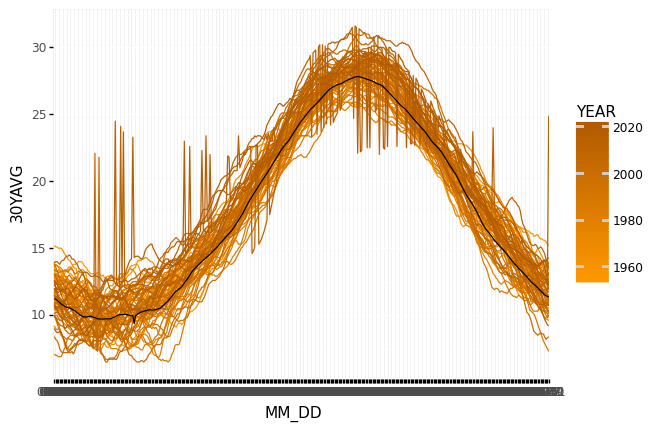

<ggplot: (140940532330)>

In [1634]:
from plotnine import *
import plotnine as p9
from mizani.palettes import (hue_pal, brewer_pal, grey_pal,
                             gradient_n_pal, cmap_pal, cmap_d_pal,
                             desaturate_pal)
figure_size=(15, 3)
ggplot() +\
    geom_line(data=hnms_updated8,mapping=aes(x='MM_DD', y ='30YAVG',color = 'YEAR', group='YEAR'))+\
    scale_y_continuous(breaks=np.linspace(start=5, stop=50, num=10))+\
    geom_line(data=hnms1974_1999_4,mapping=aes(x= 'MM_DD', y ='30YAVG',group=1))+\
    p9.scale_color_gradient(low="#ff9800",high="#b15a02")


### Conclusions - Q3


The conclusions for this one are expected in a way. We see with darker orange the years after 2000 and it's easy to notice we have an increase in the daily TAVG and especially compared to the baseline

## Q4

### Extreme Temperature Events

> We want to calculate the number of extreme temperature events for each year for the full period from 1955 to 2020 and then compare it to the baseline, that is the 1974-1999 period.

In [1635]:
hnms_updated9=hnms_updated8.reset_index()
hnms_updated9

,index,DATE,STATION,NAME,NEWDATE,PRCP,SNWD,TAVG,TMAX,TMIN,MONTH,YEAR,30YAVG,MM_DD,MM,DD
0,0,2055-01-01,GR000016716,"HELLINIKON, GR",1955-01-01,0.0,NaN,14.0,18.0,10.0,1.0,1955.0,14.0,01-01,Jan,01
1,1,2055-01-02,GR000016716,"HELLINIKON, GR",1955-01-02,2.0,NaN,11.0,14.0,7.0,1.0,1955.0,12.5,01-02,Jan,02
2,2,2055-01-03,GR000016716,"HELLINIKON, GR",1955-01-03,0.0,NaN,12.0,16.0,9.0,1.0,1955.0,12.3,01-03,Jan,03
3,3,2055-01-04,GR000016716,"HELLINIKON, GR",1955-01-04,0.0,NaN,13.0,19.0,7.0,1.0,1955.0,12.5,01-04,Jan,04
4,4,2055-01-05,GR000016716,"HELLINIKON, GR",1955-01-05,0.0,NaN,13.0,18.0,8.0,1.0,1955.0,12.6,01-05,Jan,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24102,23246,2020-12-27,GR000016716,"HELLINIKON, GR",2020-12-27,0.0,NaN,17.0,NaN,NaN,12.0,2020.0,14.0,12-27,Dec,27
24103,23247,2020-12-28,GR000016716,"HELLINIKON, GR",2020-12-28,7.0,NaN,15.0,18.0,12.0,12.0,2020.0,14.1,12-28,Dec,28
24104,23248,2020-12-29,GR000016716,"HELLINIKON, GR",2020-12-29,0.0,NaN,16.0,20.0,12.0,12.0,2020.0,14.1,12-29,Dec,29
24105,23249,2020-12-30,GR000016716,"HELLINIKON, GR",2020-12-30,0.0,NaN,17.0,20.0,15.0,12.0,2020.0,14.2,12-30,Dec,30


> In the beginning I thought I would use TMAX and created a process that fills the gaps for TMAX

In [1636]:
#(check65=hnms_updated9[hnms_updated9['TMAX'].isna()].index.tolist()
#hnms_updated9['TMIN'] = hnms_updated9['TMIN'].astype(float)
#hnms_updated9['TMAX'].fillna(2*(hnms_updated9['TAVG'])-hnms_updated9['TMIN'],inplace=True)
#hnms_updated9['TMAX'] = hnms_updated9['TMAX'].astype(float)
#tm=hnms_updated9['TMAX']
#counter=0
#while counter<53:
#    tmax1=(tm[(check65[counter])-1] + tm[(check65[counter])+1])/2
#    counter=counter+1
#    hnms_updated9['TMAX'][check65[counter]]=tmax1


>  Adding a DAY column and filtering to '74-'99

In [1637]:
hnms_updated9['DAY']=pd.to_datetime(hnms_updated9.NEWDATE).dt.day
hnms1974_1999_5=hnms_updated9.loc[(hnms_updated9.YEAR>=1974) & (hnms_updated9.YEAR<=1999)]
hnms1974_1999_5['TMAX'] = hnms1974_1999_5['TMAX'].astype(float)

hnms1974_1999_5

<ipython-input-1637-5daf770882c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,index,DATE,STATION,NAME,NEWDATE,PRCP,SNWD,TAVG,TMAX,TMIN,MONTH,YEAR,30YAVG,MM_DD,MM,DD,DAY
6940,6940,1974-01-01,GR000016716,"HELLINIKON, GR",1974-01-01,0.0,NaN,12.0,13.0,10.0,1.0,1974.0,13.0,01-01,Jan,01,1
6941,6941,1974-01-02,GR000016716,"HELLINIKON, GR",1974-01-02,0.0,NaN,14.0,16.0,11.0,1.0,1974.0,13.1,01-02,Jan,02,2
6942,6942,1974-01-03,GR000016716,"HELLINIKON, GR",1974-01-03,10.0,NaN,12.0,16.0,11.0,1.0,1974.0,13.0,01-03,Jan,03,3
6943,6943,1974-01-04,GR000016716,"HELLINIKON, GR",1974-01-04,0.0,NaN,11.0,13.0,8.0,1.0,1974.0,12.9,01-04,Jan,04,4
6944,6944,1974-01-05,GR000016716,"HELLINIKON, GR",1974-01-05,0.0,NaN,9.0,11.0,8.0,1.0,1974.0,12.8,01-05,Jan,05,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16431,16431,1999-12-27,GR000016716,"HELLINIKON, GR",1999-12-27,0.0,NaN,16.0,19.0,11.0,12.0,1999.0,13.3,12-27,Dec,27,27
16432,16432,1999-12-28,GR000016716,"HELLINIKON, GR",1999-12-28,0.0,NaN,17.0,20.0,13.0,12.0,1999.0,13.6,12-28,Dec,28,28
16433,16433,1999-12-29,GR000016716,"HELLINIKON, GR",1999-12-29,0.0,NaN,15.0,18.0,14.0,12.0,1999.0,13.7,12-29,Dec,29,29
16434,16434,1999-12-30,GR000016716,"HELLINIKON, GR",1999-12-30,0.0,NaN,13.0,17.0,8.0,12.0,1999.0,13.8,12-30,Dec,30,30


### Calculation of extreme events for 1974 -1999

> Grouping on Day and month level so we can get the mean temperature for each day across the whole period of '73-'99

In [1638]:
hnms_group5=hnms1974_1999_5.groupby(['DAY','MM'],as_index=False)
hnms1974_1999_5_group=hnms_group5.mean()
hnms1974_1999_5_group

,DAY,MM,index,PRCP,SNWD,TAVG,TMAX,MONTH,YEAR,30YAVG
0,1,Apr,11595.730769,3.769231,NaN,13.192308,17.115385,4.0,1986.5,11.873077
1,1,Aug,11717.730769,0.038462,NaN,27.807692,32.384615,8.0,1986.5,27.357692
2,1,Dec,11839.730769,1.538462,NaN,12.307692,15.884615,12.0,1986.5,14.457692
3,1,Feb,11536.500000,1.384615,NaN,9.192308,12.730769,2.0,1986.5,9.761538
4,1,Jan,11505.500000,1.961538,NaN,10.423077,13.961538,1.0,1986.5,11.257692
...,...,...,...,...,...,...,...,...,...,...
361,31,Jan,11535.500000,1.423077,NaN,9.346154,13.230769,1.0,1986.5,9.811538
362,31,Jul,11716.730769,0.538462,NaN,27.307692,31.846154,7.0,1986.5,27.288462
363,31,Mar,11594.730769,0.653846,NaN,13.576923,17.576923,3.0,1986.5,11.803846
364,31,May,11655.730769,0.807692,NaN,21.884615,26.115385,5.0,1986.5,19.669231


> Then we merge the grouped dataset with the original so we can match every day with its average TAVG and then compare if it exceeds that 10%
><br> After that we create the filtered data that are above 110% of the average.

In [1639]:
hnms1974_1999_6=pd.merge(hnms1974_1999_5,
                hnms1974_1999_5_group[['TAVG','MM','DAY']],
                on=['DAY','MM'],
                how = 'left')

hnms1974_1999_7=hnms1974_1999_6.loc[hnms1974_1999_6['TAVG_x']>1.1*hnms1974_1999_6['TAVG_y']]
hnms1974_1999_7


,index,DATE,STATION,NAME,NEWDATE,PRCP,SNWD,TAVG_x,TMAX,TMIN,MONTH,YEAR,30YAVG,MM_DD,MM,DD,DAY,TAVG_y
0,6940,1974-01-01,GR000016716,"HELLINIKON, GR",1974-01-01,0.0,NaN,12.0,13.0,10.0,1.0,1974.0,13.0,01-01,Jan,01,1,10.423077
1,6941,1974-01-02,GR000016716,"HELLINIKON, GR",1974-01-02,0.0,NaN,14.0,16.0,11.0,1.0,1974.0,13.1,01-02,Jan,02,2,10.615385
2,6942,1974-01-03,GR000016716,"HELLINIKON, GR",1974-01-03,10.0,NaN,12.0,16.0,11.0,1.0,1974.0,13.0,01-03,Jan,03,3,10.192308
3,6943,1974-01-04,GR000016716,"HELLINIKON, GR",1974-01-04,0.0,NaN,11.0,13.0,8.0,1.0,1974.0,12.9,01-04,Jan,04,4,9.615385
20,6960,1974-01-21,GR000016716,"HELLINIKON, GR",1974-01-21,0.0,NaN,11.0,13.0,7.0,1.0,1974.0,10.3,01-21,Jan,21,21,9.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9491,16431,1999-12-27,GR000016716,"HELLINIKON, GR",1999-12-27,0.0,NaN,16.0,19.0,11.0,12.0,1999.0,13.3,12-27,Dec,27,27,9.807692
9492,16432,1999-12-28,GR000016716,"HELLINIKON, GR",1999-12-28,0.0,NaN,17.0,20.0,13.0,12.0,1999.0,13.6,12-28,Dec,28,28,10.230769
9493,16433,1999-12-29,GR000016716,"HELLINIKON, GR",1999-12-29,0.0,NaN,15.0,18.0,14.0,12.0,1999.0,13.7,12-29,Dec,29,29,10.730769
9494,16434,1999-12-30,GR000016716,"HELLINIKON, GR",1999-12-30,0.0,NaN,13.0,17.0,8.0,12.0,1999.0,13.8,12-30,Dec,30,30,11.346154


> After the matching of the 2 datasets we group by year and with the use of count we find the days with extreme events for each year from the DAY column (and the others as well)

In [1640]:
hnms1974_1999_7_group=hnms1974_1999_7.groupby('YEAR')
hnms1974_1999_8_group=hnms1974_1999_7_group.count()
hnms1974_1999_8_group

,index,DATE,STATION,NAME,NEWDATE,PRCP,SNWD,TAVG_x,TMAX,TMIN,MONTH,30YAVG,MM_DD,MM,DD,DAY,TAVG_y
YEAR,,,,,,,,,,,,,,,,,
1974.0,67,67,67,67,67,67,0,67,67,67,67,67,67,67,67,67,67
1975.0,104,104,104,104,104,104,0,104,104,104,104,104,104,104,104,104,104
1976.0,81,81,81,81,81,81,0,81,81,81,81,81,81,81,81,81,81
1977.0,119,119,119,119,119,119,0,119,119,119,119,119,119,119,119,119,119
1978.0,80,80,80,80,80,80,0,80,80,80,80,80,80,80,80,80,80
1979.0,114,114,114,114,114,114,0,114,113,113,114,114,114,114,114,114,114
1980.0,67,67,67,67,67,67,0,67,67,67,67,67,67,67,67,67,67
1981.0,94,94,94,94,94,94,0,94,94,94,94,94,94,94,94,94,94
1982.0,51,51,51,51,51,51,0,51,51,51,51,51,51,51,51,51,51


> Calculation of the aveage extreme heat events per year for the '74-'99 period

In [1641]:
baseline_days=hnms1974_1999_8_group['DAY'].mean()
baseline=baseline_days/365
baseline

0.25395152792413067

### Calculation of extreme events for 1955 - 2020

> We reperat the previous procces

In [1642]:
hnms_updated9

,index,DATE,STATION,NAME,NEWDATE,PRCP,SNWD,TAVG,TMAX,TMIN,MONTH,YEAR,30YAVG,MM_DD,MM,DD,DAY
0,0,2055-01-01,GR000016716,"HELLINIKON, GR",1955-01-01,0.0,NaN,14.0,18.0,10.0,1.0,1955.0,14.0,01-01,Jan,01,1
1,1,2055-01-02,GR000016716,"HELLINIKON, GR",1955-01-02,2.0,NaN,11.0,14.0,7.0,1.0,1955.0,12.5,01-02,Jan,02,2
2,2,2055-01-03,GR000016716,"HELLINIKON, GR",1955-01-03,0.0,NaN,12.0,16.0,9.0,1.0,1955.0,12.3,01-03,Jan,03,3
3,3,2055-01-04,GR000016716,"HELLINIKON, GR",1955-01-04,0.0,NaN,13.0,19.0,7.0,1.0,1955.0,12.5,01-04,Jan,04,4
4,4,2055-01-05,GR000016716,"HELLINIKON, GR",1955-01-05,0.0,NaN,13.0,18.0,8.0,1.0,1955.0,12.6,01-05,Jan,05,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24102,23246,2020-12-27,GR000016716,"HELLINIKON, GR",2020-12-27,0.0,NaN,17.0,NaN,NaN,12.0,2020.0,14.0,12-27,Dec,27,27
24103,23247,2020-12-28,GR000016716,"HELLINIKON, GR",2020-12-28,7.0,NaN,15.0,18.0,12.0,12.0,2020.0,14.1,12-28,Dec,28,28
24104,23248,2020-12-29,GR000016716,"HELLINIKON, GR",2020-12-29,0.0,NaN,16.0,20.0,12.0,12.0,2020.0,14.1,12-29,Dec,29,29
24105,23249,2020-12-30,GR000016716,"HELLINIKON, GR",2020-12-30,0.0,NaN,17.0,20.0,15.0,12.0,2020.0,14.2,12-30,Dec,30,30


In [1643]:
hnms_group6=hnms_updated9.groupby(['DAY','MM'],as_index=False)
hnms_updated10=hnms_group5.mean()
hnms_updated10

,DAY,MM,index,PRCP,SNWD,TAVG,TMAX,MONTH,YEAR,30YAVG
0,1,Apr,11595.730769,3.769231,NaN,13.192308,17.115385,4.0,1986.5,11.873077
1,1,Aug,11717.730769,0.038462,NaN,27.807692,32.384615,8.0,1986.5,27.357692
2,1,Dec,11839.730769,1.538462,NaN,12.307692,15.884615,12.0,1986.5,14.457692
3,1,Feb,11536.500000,1.384615,NaN,9.192308,12.730769,2.0,1986.5,9.761538
4,1,Jan,11505.500000,1.961538,NaN,10.423077,13.961538,1.0,1986.5,11.257692
...,...,...,...,...,...,...,...,...,...,...
361,31,Jan,11535.500000,1.423077,NaN,9.346154,13.230769,1.0,1986.5,9.811538
362,31,Jul,11716.730769,0.538462,NaN,27.307692,31.846154,7.0,1986.5,27.288462
363,31,Mar,11594.730769,0.653846,NaN,13.576923,17.576923,3.0,1986.5,11.803846
364,31,May,11655.730769,0.807692,NaN,21.884615,26.115385,5.0,1986.5,19.669231


In [1644]:
hnms_updated11=pd.merge(hnms_updated9,
                hnms_updated10[['TAVG','MM','DAY']],
                on=['DAY','MM'],
                how = 'left')


days_counter=hnms_updated11.groupby('YEAR')
days_counter1=days_counter.count()
days_counter1

,index,DATE,STATION,NAME,NEWDATE,PRCP,SNWD,TAVG_x,TMAX,TMIN,MONTH,30YAVG,MM_DD,MM,DD,DAY,TAVG_y
YEAR,,,,,,,,,,,,,,,,,
1955.0,365,365,365,365,365,365,0,365,365,365,365,365,365,365,365,365,365
1956.0,366,366,366,366,366,366,0,366,366,366,366,366,366,366,366,366,366
1957.0,365,365,365,365,365,365,0,364,365,364,365,335,365,365,365,365,365
1958.0,365,365,365,365,365,365,0,365,365,365,365,365,365,365,365,365,365
1959.0,365,365,365,365,365,365,0,365,365,365,365,365,365,365,365,365,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016.0,366,366,365,365,366,366,0,366,366,366,366,366,366,366,366,366,366
2017.0,365,365,342,342,365,365,0,365,365,365,365,365,365,365,365,365,365
2018.0,365,365,364,364,365,365,0,365,365,365,365,365,365,365,365,365,365


In [1645]:
hnms_updated12=hnms_updated11.loc[hnms_updated11['TAVG_x']>1.1*hnms_updated11['TAVG_y']]
hnms_updated12

,index,DATE,STATION,NAME,NEWDATE,PRCP,SNWD,TAVG_x,TMAX,TMIN,MONTH,YEAR,30YAVG,MM_DD,MM,DD,DAY,TAVG_y
0,0,2055-01-01,GR000016716,"HELLINIKON, GR",1955-01-01,0.0,NaN,14.0,18.0,10.0,1.0,1955.0,14.0,01-01,Jan,01,1,10.423077
2,2,2055-01-03,GR000016716,"HELLINIKON, GR",1955-01-03,0.0,NaN,12.0,16.0,9.0,1.0,1955.0,12.3,01-03,Jan,03,3,10.192308
3,3,2055-01-04,GR000016716,"HELLINIKON, GR",1955-01-04,0.0,NaN,13.0,19.0,7.0,1.0,1955.0,12.5,01-04,Jan,04,4,9.615385
4,4,2055-01-05,GR000016716,"HELLINIKON, GR",1955-01-05,0.0,NaN,13.0,18.0,8.0,1.0,1955.0,12.6,01-05,Jan,05,5,9.961538
5,5,2055-01-06,GR000016716,"HELLINIKON, GR",1955-01-06,0.0,NaN,14.0,19.0,9.0,1.0,1955.0,12.8,01-06,Jan,06,6,9.730769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24102,23246,2020-12-27,GR000016716,"HELLINIKON, GR",2020-12-27,0.0,NaN,17.0,NaN,NaN,12.0,2020.0,14.0,12-27,Dec,27,27,9.807692
24103,23247,2020-12-28,GR000016716,"HELLINIKON, GR",2020-12-28,7.0,NaN,15.0,18.0,12.0,12.0,2020.0,14.1,12-28,Dec,28,28,10.230769
24104,23248,2020-12-29,GR000016716,"HELLINIKON, GR",2020-12-29,0.0,NaN,16.0,20.0,12.0,12.0,2020.0,14.1,12-29,Dec,29,29,10.730769
24105,23249,2020-12-30,GR000016716,"HELLINIKON, GR",2020-12-30,0.0,NaN,17.0,20.0,15.0,12.0,2020.0,14.2,12-30,Dec,30,30,11.346154


In [1646]:
hnms_updated13=hnms_updated12.groupby('YEAR',as_index=False)
hnms_updated13_group=hnms_updated13.count()
hnms_updated13_group['PERCENTAGE']=hnms_updated13_group['DAY']/365
hnms_updated13_group

,YEAR,index,DATE,STATION,NAME,NEWDATE,PRCP,SNWD,TAVG_x,TMAX,TMIN,MONTH,30YAVG,MM_DD,MM,DD,DAY,TAVG_y,PERCENTAGE
0,1955.0,129,129,129,129,129,129,0,129,129,129,129,129,129,129,129,129,129,0.353425
1,1956.0,115,115,115,115,115,115,0,115,115,115,115,115,115,115,115,115,115,0.315068
2,1957.0,113,113,113,113,113,113,0,113,113,113,113,102,113,113,113,113,113,0.309589
3,1958.0,137,137,137,137,137,137,0,137,137,137,137,137,137,137,137,137,137,0.375342
4,1959.0,98,98,98,98,98,98,0,98,98,98,98,98,98,98,98,98,98,0.268493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2016.0,157,157,156,156,157,157,0,157,157,157,157,157,157,157,157,157,157,0.430137
62,2017.0,170,170,163,163,170,170,0,170,170,170,170,170,170,170,170,170,170,0.465753
63,2018.0,174,174,174,174,174,174,0,174,174,174,174,174,174,174,174,174,174,0.476712
64,2019.0,161,161,161,161,161,161,0,161,161,161,161,161,161,161,161,161,161,0.441096


### Plot

In [1647]:
from numpy import linspace
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

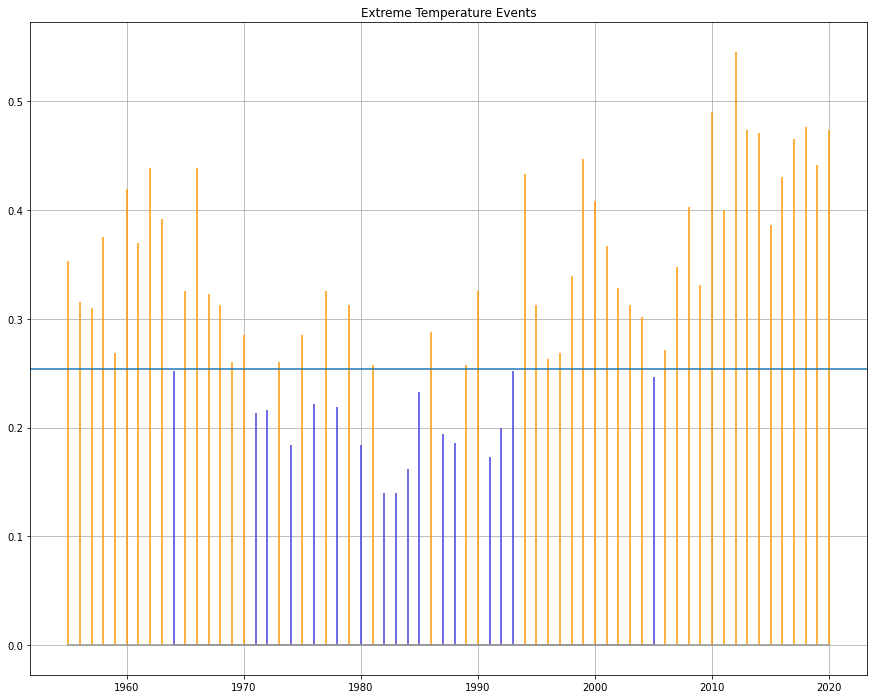

In [1648]:
count_up=hnms_updated13_group.loc[hnms_updated13_group['PERCENTAGE']>=baseline]
count_down=hnms_updated13_group.loc[hnms_updated13_group['PERCENTAGE']<baseline]
plt.figure(figsize=[15,12])
plt.grid(True)
plt.stem(count_up['YEAR'],count_up['PERCENTAGE'],linefmt ='#FF9900',markerfmt=' ', basefmt ='#959595')
plt.stem(count_down['YEAR'],count_down['PERCENTAGE'],linefmt ='#403fdc',markerfmt=' ', basefmt ='#959595')
plt.axhline(y=baseline)
plt.title("Extreme Temperature Events")
plt.show()

### Conclusions - Q4

The conclusions are similar from the Q2 question. It follows a bit the outline of the Plot from Q2 and it shows the dramatic increase of the extreme heat events after the 90s. The same markers exist as well 2000 until 2005 and then 2006 and after.
<br> After 2014  we have a small increas of the effects and then we see a relative stabilization of the effects.
<br> The plot maybe it's not exactly the same due to some fillings I did during my process in the previous steps

## Q5 working with rainfall data

### Precipitation

> First we will calculate the sum of rainfall

In [1649]:
hnms_updated9

,index,DATE,STATION,NAME,NEWDATE,PRCP,SNWD,TAVG,TMAX,TMIN,MONTH,YEAR,30YAVG,MM_DD,MM,DD,DAY
0,0,2055-01-01,GR000016716,"HELLINIKON, GR",1955-01-01,0.0,NaN,14.0,18.0,10.0,1.0,1955.0,14.0,01-01,Jan,01,1
1,1,2055-01-02,GR000016716,"HELLINIKON, GR",1955-01-02,2.0,NaN,11.0,14.0,7.0,1.0,1955.0,12.5,01-02,Jan,02,2
2,2,2055-01-03,GR000016716,"HELLINIKON, GR",1955-01-03,0.0,NaN,12.0,16.0,9.0,1.0,1955.0,12.3,01-03,Jan,03,3
3,3,2055-01-04,GR000016716,"HELLINIKON, GR",1955-01-04,0.0,NaN,13.0,19.0,7.0,1.0,1955.0,12.5,01-04,Jan,04,4
4,4,2055-01-05,GR000016716,"HELLINIKON, GR",1955-01-05,0.0,NaN,13.0,18.0,8.0,1.0,1955.0,12.6,01-05,Jan,05,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24102,23246,2020-12-27,GR000016716,"HELLINIKON, GR",2020-12-27,0.0,NaN,17.0,NaN,NaN,12.0,2020.0,14.0,12-27,Dec,27,27
24103,23247,2020-12-28,GR000016716,"HELLINIKON, GR",2020-12-28,7.0,NaN,15.0,18.0,12.0,12.0,2020.0,14.1,12-28,Dec,28,28
24104,23248,2020-12-29,GR000016716,"HELLINIKON, GR",2020-12-29,0.0,NaN,16.0,20.0,12.0,12.0,2020.0,14.1,12-29,Dec,29,29
24105,23249,2020-12-30,GR000016716,"HELLINIKON, GR",2020-12-30,0.0,NaN,17.0,20.0,15.0,12.0,2020.0,14.2,12-30,Dec,30,30


In [1650]:
prcp_group=hnms_updated9.groupby('YEAR',as_index=False)
prcp_sum=prcp_group.sum()
prcp_sum['YEAR']=prcp_sum['YEAR'].astype(int)
prcp_sum

,YEAR,index,PRCP,SNWD,TAVG,MONTH,30YAVG,DAY
0,1955,66430,549.0,0.0,6849.0,2382.0,6851.3,5738
1,1956,200385,278.0,0.0,6646.0,2384.0,6686.9,5767
2,1957,333245,298.0,0.0,6688.0,2382.0,6325.0,5738
3,1958,466470,348.0,0.0,6818.0,2382.0,6796.3,5738
4,1959,599695,213.0,0.0,6541.0,2382.0,6557.5,5738
...,...,...,...,...,...,...,...,...
61,2016,7919393,258.0,0.0,7093.0,2384.0,7142.1,5767
62,2017,8072769,304.0,0.0,7002.0,2382.0,6932.9,5738
63,2018,8154952,375.0,0.0,7111.0,2382.0,7121.7,5738
64,2019,8286230,568.0,0.0,7013.0,2382.0,6995.3,5738


> Then we will find the days that were rainy.

In [1651]:
prcp_days=hnms_updated9.loc[hnms_updated9['PRCP']>0]
prcp_days.groupby('YEAR')
prcp_days2=prcp_days.groupby('YEAR', as_index=False)
prcp_dayscount=prcp_days2.count()
prcp_dayscount['YEAR']=prcp_dayscount['YEAR'].astype(int)
prcp_dayscount

,YEAR,index,DATE,STATION,NAME,NEWDATE,PRCP,SNWD,TAVG,TMAX,TMIN,MONTH,30YAVG,MM_DD,MM,DD,DAY
0,1955,57,57,57,57,57,57,0,57,57,57,57,57,57,57,57,57
1,1956,43,43,43,43,43,43,0,43,43,43,43,43,43,43,43,43
2,1957,43,43,43,43,43,43,0,43,43,43,43,43,43,43,43,43
3,1958,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,48
4,1959,44,44,44,44,44,44,0,44,44,44,44,44,44,44,44,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2016,33,33,33,33,33,33,0,33,33,33,33,33,33,33,33,33
62,2017,42,42,40,40,42,42,0,42,42,42,42,42,42,42,42,42
63,2018,47,47,47,47,47,47,0,47,47,47,47,47,47,47,47,47
64,2019,48,48,48,48,48,48,0,48,48,48,48,48,48,48,48,48


> Then we will merge so we can devide the sum of rainy with the rainy days

In [1652]:
prcp_merge=pd.merge(prcp_sum,
                prcp_dayscount[['YEAR','DAY']],
                on=['YEAR'],
                how = 'left')

prcp_merge

,YEAR,index,PRCP,SNWD,TAVG,MONTH,30YAVG,DAY_x,DAY_y
0,1955,66430,549.0,0.0,6849.0,2382.0,6851.3,5738,57
1,1956,200385,278.0,0.0,6646.0,2384.0,6686.9,5767,43
2,1957,333245,298.0,0.0,6688.0,2382.0,6325.0,5738,43
3,1958,466470,348.0,0.0,6818.0,2382.0,6796.3,5738,48
4,1959,599695,213.0,0.0,6541.0,2382.0,6557.5,5738,44
...,...,...,...,...,...,...,...,...,...
61,2016,7919393,258.0,0.0,7093.0,2384.0,7142.1,5767,33
62,2017,8072769,304.0,0.0,7002.0,2382.0,6932.9,5738,42
63,2018,8154952,375.0,0.0,7111.0,2382.0,7121.7,5738,47
64,2019,8286230,568.0,0.0,7013.0,2382.0,6995.3,5738,48


> Addition of column that has the ration rainfall/rainy days

In [1653]:
prcp_merge['PRCP_RAINY_DAY']=prcp_merge['PRCP']/prcp_merge['DAY_y']
prcp_merge2=prcp_merge

> 10 days Rolling average calculation

In [1654]:
prcp_merge2['ROLLING_AVG']=''
avg4=prcp_merge2['ROLLING_AVG']
rd1=prcp_merge2['PRCP_RAINY_DAY']
d = 0
k = 1
sum4=0
while d < 66:
    if d < 10:
        rolling_avg4=(rd1[d]+sum4)/k
        avg4[d]=rolling_avg4
        k=k+1
        sum4=rd1[d]+sum4
        d=d+1
    else: 
        rolling_avg4=(rd1[d]+rd1[d-9]+rd1[d-8]+rd1[d-7]+rd1[d-6]+rd1[d-5]+rd1[d-4]+rd1[d-3]+rd1[d-2]+rd1[d-1])/10
        avg4[d]=rolling_avg4
        d=d+1
prcp_merge2

<ipython-input-1654-c02cab3fe08f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-1654-c02cab3fe08f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,YEAR,index,PRCP,SNWD,TAVG,MONTH,30YAVG,DAY_x,DAY_y,PRCP_RAINY_DAY,ROLLING_AVG
0,1955,66430,549.0,0.0,6849.0,2382.0,6851.3,5738,57,9.631579,9.631579
1,1956,200385,278.0,0.0,6646.0,2384.0,6686.9,5767,43,6.465116,8.048348
2,1957,333245,298.0,0.0,6688.0,2382.0,6325.0,5738,43,6.930233,7.675643
3,1958,466470,348.0,0.0,6818.0,2382.0,6796.3,5738,48,7.250000,7.569232
4,1959,599695,213.0,0.0,6541.0,2382.0,6557.5,5738,44,4.840909,7.023567
...,...,...,...,...,...,...,...,...,...,...,...
61,2016,7919393,258.0,0.0,7093.0,2384.0,7142.1,5767,33,7.818182,8.343236
62,2017,8072769,304.0,0.0,7002.0,2382.0,6932.9,5738,42,7.238095,8.331148
63,2018,8154952,375.0,0.0,7111.0,2382.0,7121.7,5738,47,7.978723,8.434284
64,2019,8286230,568.0,0.0,7013.0,2382.0,6995.3,5738,48,11.833333,8.932162


### Plot

In [1655]:
from numpy import linspace
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

In [1656]:
count_up=hnms_updated13_group.loc[hnms_updated13_group['PERCENTAGE']>=baseline]
count_down=hnms_updated13_group.loc[hnms_updated13_group['PERCENTAGE']<baseline]

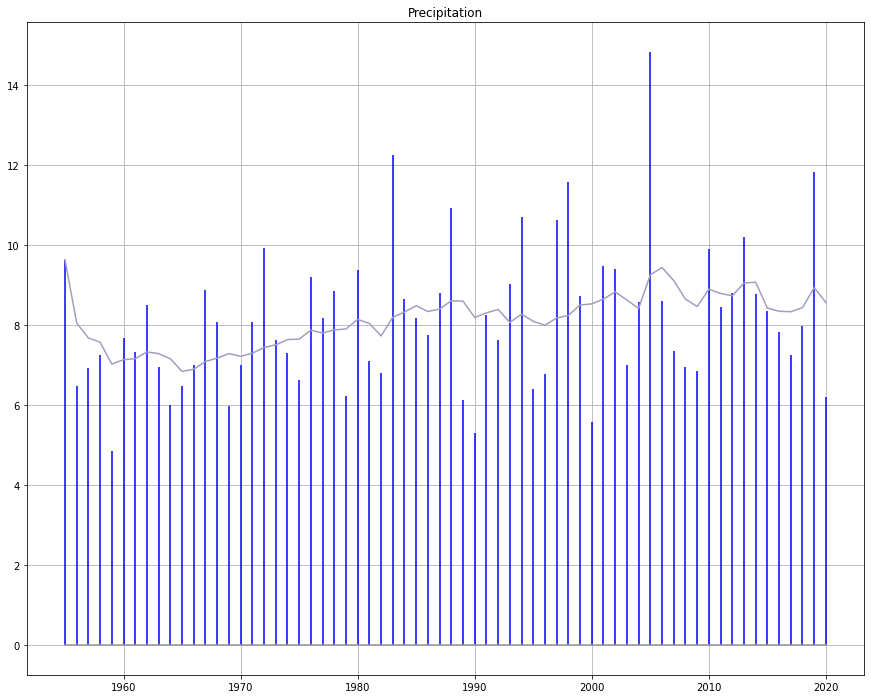

In [1657]:

plt.figure(figsize=[15,12])
plt.grid(True)
plt.stem(prcp_merge2['YEAR'],prcp_merge2['PRCP_RAINY_DAY'],linefmt ='blue',markerfmt=' ', basefmt ='#959595')
plt.plot(prcp_merge2['YEAR'],prcp_merge2['ROLLING_AVG'],color='#a29dbf')
plt.title("Precipitation")
plt.show()

### Conclusions - Q5

From the plot we see that there is a relative stability in the rainfalls except some peaks. There is a gap between the baseline as the precipitations due to climate change have increases.
<br> The plot is a bit different from the original one as I did a filling in the blank data from the data of Meteo as I considered the last column of the dataset as Precipitation.